In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_lfw_people
from mpl_toolkits.mplot3d import Axes3D

### 1  Part I - Implementing PCA

#### Loading and claening digits dataset from inf and nan

In [3]:
digits = load_digits()
#print(digits.DESCR)

# Cleaning the data
df = pd.DataFrame(digits.data)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Converting back to an array
X= np.array(df)
y= digits.target

#### Visualizing some samples of the dataset

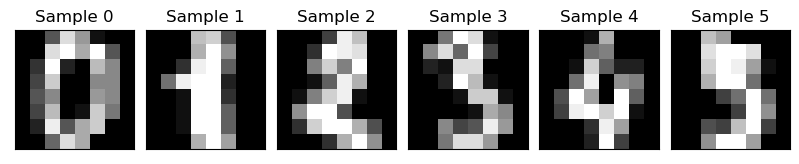

In [4]:
# Visualizing 6 samples from the digits dataset
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 5),
                         subplot_kw={'xticks': [], 'yticks': []},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Sample {i}")
#plt.tight_layout()
plt.show()

#### Implemnting PCA and keeping the first 2 pricipal components

[0.14890594 0.13618771]


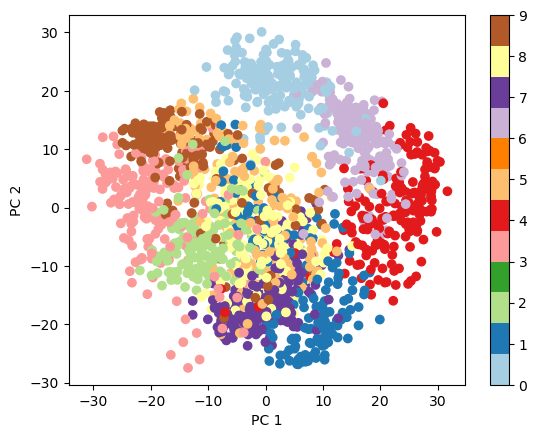

In [5]:
pca = PCA(n_components=2)
pca.fit(X)
proj = pca.transform(X)
print(pca.explained_variance_ratio_)

plt.scatter(proj[:, 0], proj[:, 1], c=y, cmap="Paired")

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar()
plt.show()

#### PCA by performing eigenanalysis on the covariance matrix.

[7.34477606 5.83549054 5.15396118]


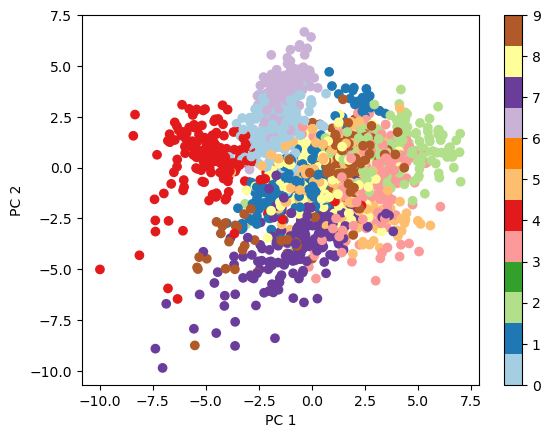

In [6]:
X_std = StandardScaler().fit_transform(X)
#X_std=X
# Computing the covariance matrix
cov_mat = np.cov(X_std.T)


# Performing eigen analysis
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# Choose number of components and sort the eigvec with eigval
k = 3 
idx = eigen_vals.argsort()[::-1]
top_k_eigen_vecs = eigen_vecs[:, idx][:, :k]

#Project data onto principal components
X_pca = np.dot(X_std, top_k_eigen_vecs)

print(eigen_vals[idx][:k])

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="Paired")

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar()
plt.show()


[0.12033916 0.09561054]


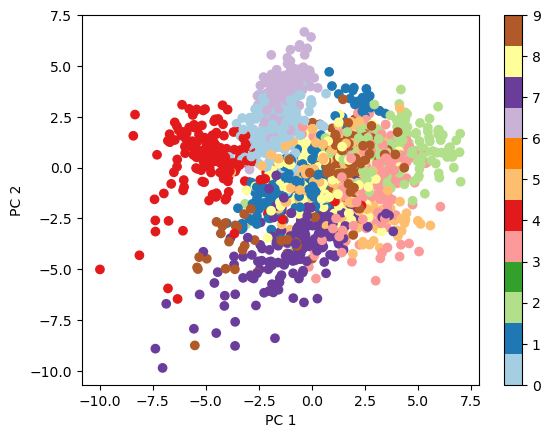

In [7]:
X_std = StandardScaler().fit_transform(X)

#mean_vec = np.mean(X_std, axis=0)
#cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
cov_mat = np.cov(X_std.T)

# Performing eigen analysis
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# Choose number of components and sort the eigvec with eigval
k = 2 
idx = eigen_vals.argsort()[::-1]
top_k_eigen_vecs = eigen_vecs[:, idx][:, :k]

#Project data onto principal components
X_pca = np.dot(X_std, top_k_eigen_vecs)

exp_val = np.zeros(k)
for i in range(k):
    exp_val[i]=(eigen_vals[i]/(eigen_vals).sum())
    
print(exp_val)
#print(eigen_vals[idx][:k])

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="Paired")

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar()
plt.show()


#### PCA by performing SVD on the data matrix

[0.14890594 0.13618771]


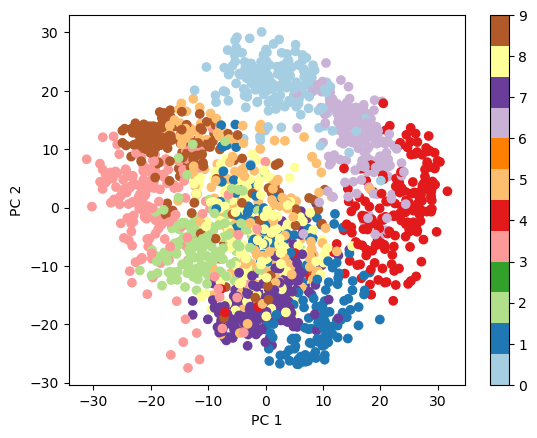

In [8]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X)
x_proj = pca.transform(X)
print(pca.explained_variance_ratio_)

plt.scatter(x_proj[:, 0], x_proj[:, 1], c=y, cmap="Paired")
#plt.scatter(proj[:, 0], proj[:, 1], c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar()
plt.show()

### 2  Part II - Noise and Dimensionality Reduction

 #### Visualize 40 samples from the digits dataset

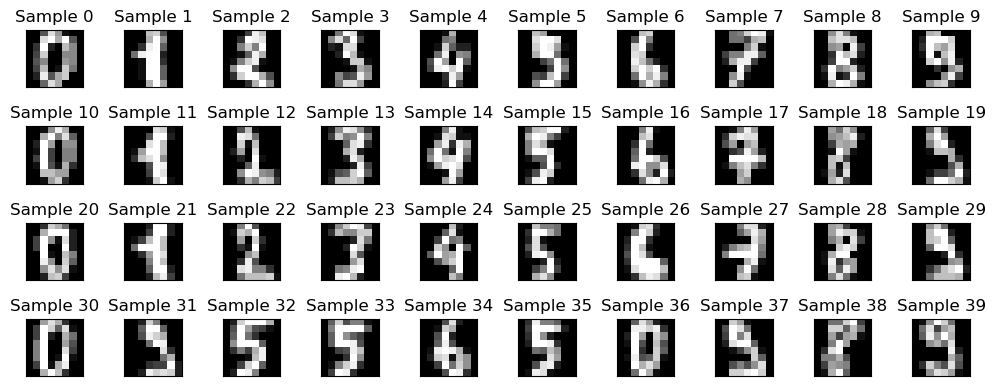

In [9]:
# Visualizing 40 samples from the digits dataset
fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(10, 4),
                         subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Sample {i}")
plt.tight_layout()
plt.show()

In [10]:
XN = X + np.random.normal(0,4,digits.data.shape)

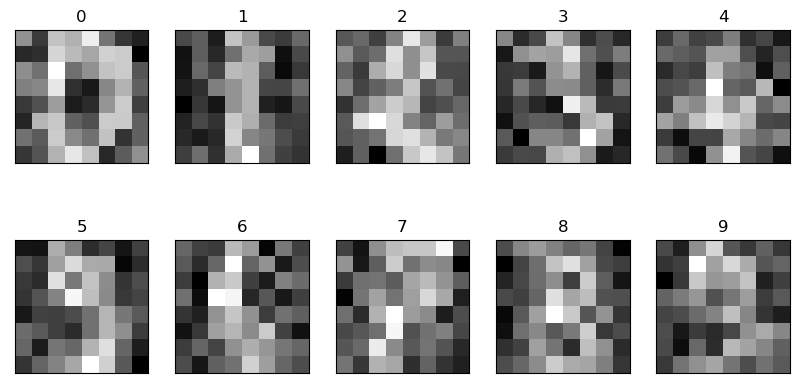

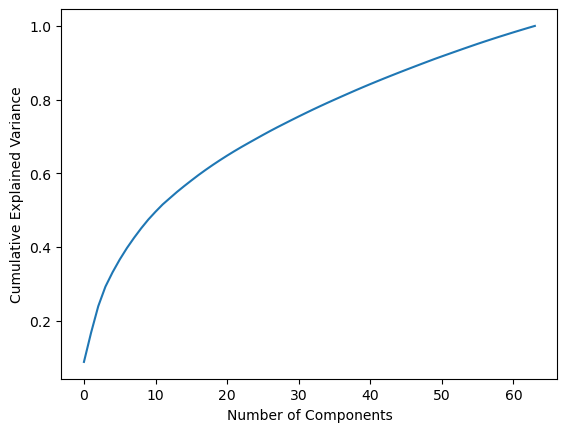

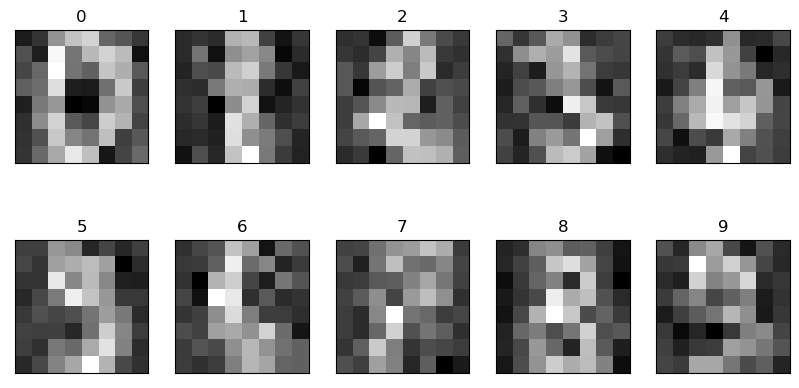

In [11]:
# Load the digits dataset
digits = load_digits()

# Add noise to the data and visualize it
noisy_digits = digits.data + np.random.normal(0, 4, digits.data.shape)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5),
                         subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(noisy_digits[i].reshape(8, 8), cmap='gray')
    ax.set_title(digits.target[i])

# Fit PCA on the data and plot the cumulative variance explained
pca = PCA(n_components=64)
pca.fit(noisy_digits)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Reconstruct the images by compressing and using only a proportion of the components
proportion_of_components = 0.8
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= proportion_of_components) + 1
compressed = pca.transform(noisy_digits)[:, :n_components]
reconstructed = pca.inverse_transform(np.hstack((compressed, np.zeros((len(noisy_digits), 64-n_components)))))

# Plot the reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5),
                         subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(reconstructed[i].reshape(8, 8), cmap='gray')
    ax.set_title(digits.target[i])
    
plt.show()


### Part III - Eigenfaces

####  Load the LFW datase

In [12]:
faces = fetch_lfw_people(min_faces_per_person=60)

#### Visualizing first 20 samples of the dataset and first 24 eigenfaces after PCA


 20 faces of the dataset


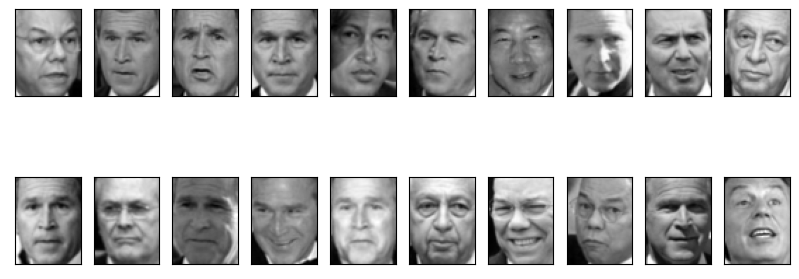


 24 eigenfaces


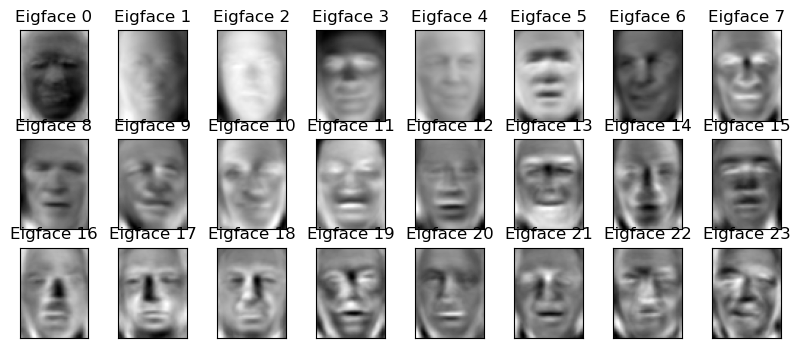

In [13]:
# Define a function to plot the first 20 samples of the dataset
def plot_faces(faces):
    fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(10, 4), subplot_kw={'xticks': [], 'yticks': []})
    print("\n","20 faces of the dataset")
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces.images[i], cmap='gray')
        #ax.set_title(faces.target_names[faces.target[i]])
    plt.show()
 
 # Plot the first 20 samples of the dataset
plot_faces(faces)

print(77*"=")

# Apply PCA to the dataset and visualize the first 24 eigenfaces
pca = PCA(n_components=24)
pca.fit(faces.data)
eigenfaces = pca.components_.reshape((24, faces.images.shape[1], faces.images.shape[2]))

# Plot the first 24 eigenfaces
fig, axes = plt.subplots(nrows=3, ncols=8, figsize=(10, 4), subplot_kw={'xticks': [], 'yticks': []})
print("\n","24 eigenfaces")
for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces[i], cmap='gray')
    ax.set_title(f"Eigface {i}")
plt.show()

The first few eigenfaces capture the most significant variation in the faces, such as lighting and orientation, while the later eigenfaces capture more subtle variations such as wrinkles or facial features.

####  first 10 images of the dataset, and the reconstructions of those images via PCA.

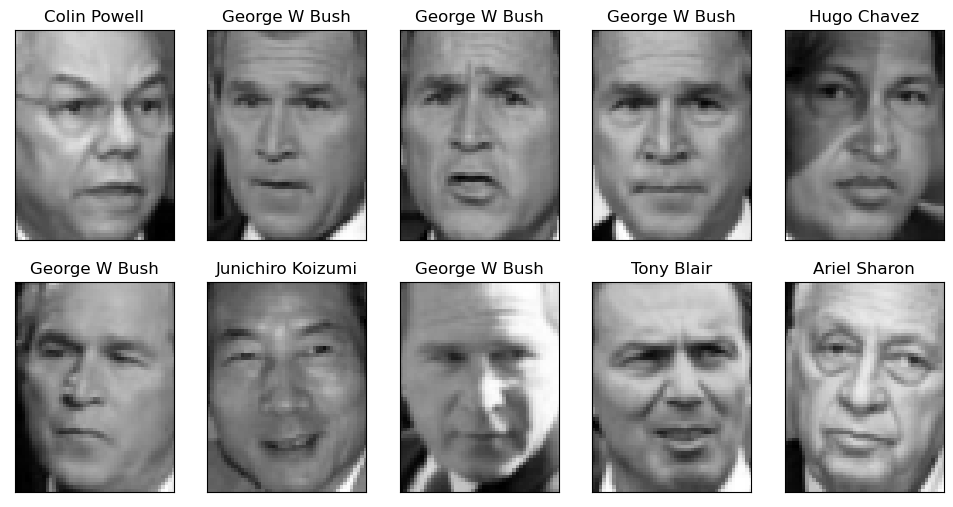

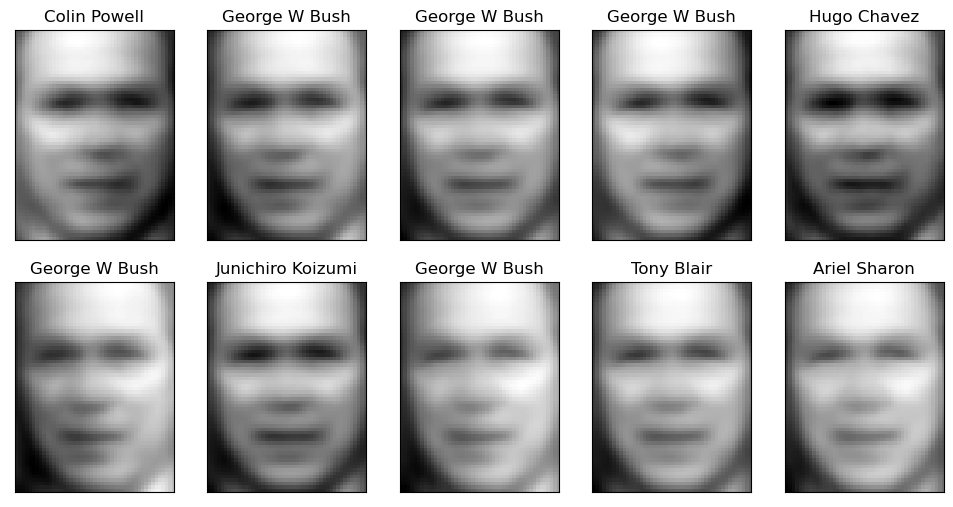

In [14]:
# Plot the first 10 images
fig, axes = plt.subplots(2, 5, figsize=(12, 6), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i], cmap='gray')
    ax.set_title(faces.target_names[faces.target[i]])

# Perform PCA on the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(faces.data)

# Reconstruct the first 10 images via PCA
X_reconstructed = pca.inverse_transform(X_pca[:10])

# Plot the reconstructions
fig, axes = plt.subplots(2, 5, figsize=(12, 6), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(X_reconstructed[i].reshape(62, 47), cmap='gray')
    ax.set_title( faces.target_names[faces.target[i]])


It is observed that the reconstructed images via PCA are not perfect, but they still capture the main features of the original images. The mages appear slightly blurry or distorted due to the loss of information during dimensionality reduction with PCA.

#### 3D scatter plot in terms of clustering the two individuals

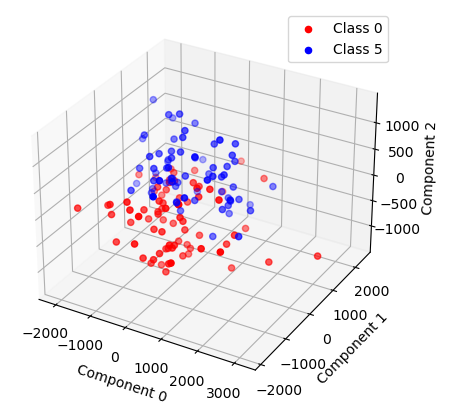

In [15]:
# Extract images of class 0 and 5
class_0 = faces.target == 0
class_5 = faces.target == 5
images = faces.images[class_0 + class_5]
labels = faces.target[class_0 + class_5]

# Transform images using PCA
pca = PCA(n_components=6)
transformed = pca.fit_transform(images.reshape(len(images), -1))

# Extract first three components
components = transformed[:, :3]

# Create scatter plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(components[labels==0, 0], components[labels==0, 1], components[labels==0, 2], c='r', label='Class 0')
ax.scatter(components[labels==5, 0], components[labels==5, 1], components[labels==5, 2], c='b', label='Class 5')
ax.set_xlabel('Component 0')
ax.set_ylabel('Component 1')
ax.set_zlabel('Component 2')
ax.legend()
plt.show()

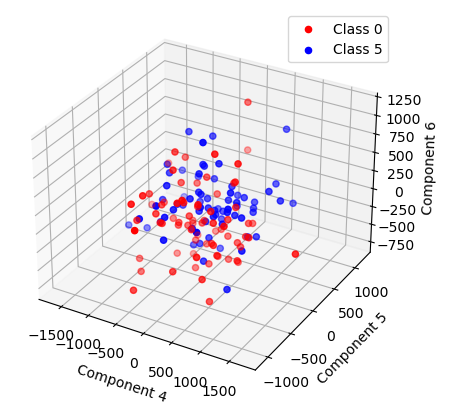

In [16]:
# Extract images of class 0 and 5
class_0 = faces.target == 0
class_5 = faces.target == 5
images = faces.images[class_0 + class_5]
labels = faces.target[class_0 + class_5]

# Transform images using PCA
pca = PCA(n_components=6)
transformed = pca.fit_transform(images.reshape(len(images), -1))

# Extract components 4, 5, 6
components = transformed[:,:6]

# Create scatter plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(components[labels==0, 3], components[labels==0, 4], components[labels==0, 5], c='r', label='Class 0')
ax.scatter(components[labels==5, 3], components[labels==5, 4], components[labels==5, 5], c='b', label='Class 5')
ax.set_xlabel('Component 4')
ax.set_ylabel('Component 5')
ax.set_zlabel('Component 6')
ax.legend()
plt.show()

Based on the scatter plots, it seems that using components 0,1,2 shows more promise in terms of clustering the two individuals, as there is a clearer separation between the two classes in this plot compared to the plot using components 4,5,6.